In [2]:
from pathlib import Path

test_files = Path("../samples/grapharna-eval-seed=0/800")
rfam = Path("Rfam.pdb")

In [3]:
with open(rfam, "r") as f:
    rfam_lines = f.readlines()
rfam_lines = rfam_lines[1:]  # Skip the header line
rfam_lines = [line.split('\t')[:2] for line in rfam_lines]
# make dict mapping, upper(rfam_line[1]) to rfam_line[0]
rfam_dict = {line[1].upper(): line[0] for line in rfam_lines}
rfam_dict

{'1VQL': 'RF02540',
 '3J8G': 'RF02541',
 '4V64': 'RF02541',
 '5EL5': 'RF02541',
 '6FTG': 'RF02543',
 '6RI5': 'RF02543',
 '6WU9': 'RF02541',
 '6XU8': 'RF02543',
 '6ZMO': 'RF02543',
 '8BHF': 'RF02543',
 '8EKB': 'RF02541',
 '8FL6': 'RF02543',
 '8FZJ': 'RF02541',
 '1VY5': 'RF02541',
 '4LT8': 'RF02541',
 '4V73': 'RF02541',
 '4V7R': 'RF02543',
 '5IB8': 'RF02541',
 '6I0Y': 'RF02541',
 '6S0X': 'RF02541',
 '6SPB': 'RF02541',
 '6UZ7': 'RF02543',
 '6WD0': 'RF02541',
 '6YLH': 'RF02543',
 '7M4W': 'RF02541',
 '7TOR': 'RF02543',
 '7Z20': 'RF02541',
 '8CGV': 'RF02541',
 '8E47': 'RF02541',
 '8FLE': 'RF02543',
 '8Y0U': 'RF02543',
 '4U3M': 'RF02543',
 '4V5G': 'RF02541',
 '6ND6': 'RF02541',
 '6WDA': 'RF02541',
 '6WDB': 'RF02541',
 '7PH9': 'RF02541',
 '7QCA': 'RF02543',
 '8AKN': 'RF02541',
 '8YOO': 'RF02543',
 '4V7B': 'RF02541',
 '4V7L': 'RF02541',
 '4V7V': 'RF02541',
 '4V8I': 'RF02541',
 '5ADY': 'RF02541',
 '5HCP': 'RF02541',
 '5NJT': 'RF02541',
 '6OSI': 'RF02541',
 '6QT0': 'RF02543',
 '6XDQ': 'RF02541',


In [4]:
rRNA_tRNA =set(["RF00001",
"RF00002",
"RF02543",
"RF02542",
"RF02541",
"RF02540",
"RF01960",
"RF00005",
"RF00177",
"RF01959",

# tRNA
"RF02541",
"RF02543",
"RF01852",
"RF00005",
"RF00233"])

# iterate over test_files
counts = {}
for file in test_files.glob("*.pdb"):
    file = file.name
    if file.endswith("_AA.pdb"):
        continue
    pdb_id = file.split("_")[0]
    if pdb_id in rfam_dict:
        rfam_id = rfam_dict[pdb_id]
        if rfam_id in rRNA_tRNA:
            continue
        if rfam_id not in counts:
            counts[rfam_id] = 1
        counts[rfam_id] += 1
    else:
        counts["Undefined"] = counts.get("Undefined", 0) + 1
print("Rfam ID counts:")
for rfam_id, count in counts.items():
    print(f"{rfam_id}: {count}")
    

Rfam ID counts:
Undefined: 4359
RF00026: 494
RF04222: 28
RF00009: 60
RF00010: 153
RF00167: 204
RF01831: 42
RF02796: 12
RF00174: 101
RF00029: 261
RF00030: 15
RF00024: 87
RF02001: 62
RF01689: 63
RF01344: 20
RF01856: 46
RF01734: 24
RF00488: 93
RF00100: 27
RF00066: 12
RF00004: 28
RF02519: 14
RF03013: 49
RF01510: 31
RF00162: 92
RF00458: 19
RF00050: 25
RF00059: 82
RF02679: 23
RF00011: 67
RF00380: 24
RF02681: 31
RF00379: 120
RF00028: 75
RF01854: 30
RF02683: 24
RF00025: 42
RF03054: 14
RF03167: 49
RF00164: 24
RF01051: 31
RF00504: 22
RF00023: 31
RF02678: 60
RF00442: 100
RF00102: 8
RF00234: 43
RF01704: 11
RF00168: 44
RF00228: 30
RF00390: 33
RF01750: 56
RF01415: 18
RF02253: 9
RF01786: 23
RF00037: 9
RF00619: 33
RF01763: 14
RF04190: 13
RF01857: 14
RF01739: 14
RF01357: 6
RF00525: 30
RF02680: 12
RF01826: 10
RF01725: 27


In [5]:
# sort dict by counts
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
print("\nSorted Rfam ID counts:")
for rfam_id, count in sorted_counts.items():
    print(f"{rfam_id}: {count}")



Sorted Rfam ID counts:
Undefined: 4359
RF00026: 494
RF00029: 261
RF00167: 204
RF00010: 153
RF00379: 120
RF00174: 101
RF00442: 100
RF00488: 93
RF00162: 92
RF00024: 87
RF00059: 82
RF00028: 75
RF00011: 67
RF01689: 63
RF02001: 62
RF00009: 60
RF02678: 60
RF01750: 56
RF03013: 49
RF03167: 49
RF01856: 46
RF00168: 44
RF00234: 43
RF01831: 42
RF00025: 42
RF00390: 33
RF00619: 33
RF01510: 31
RF02681: 31
RF01051: 31
RF00023: 31
RF01854: 30
RF00228: 30
RF00525: 30
RF04222: 28
RF00004: 28
RF00100: 27
RF01725: 27
RF00050: 25
RF01734: 24
RF00380: 24
RF02683: 24
RF00164: 24
RF02679: 23
RF01786: 23
RF00504: 22
RF01344: 20
RF00458: 19
RF01415: 18
RF00030: 15
RF02519: 14
RF03054: 14
RF01763: 14
RF01857: 14
RF01739: 14
RF04190: 13
RF02796: 12
RF00066: 12
RF02680: 12
RF01704: 11
RF01826: 10
RF02253: 9
RF00037: 9
RF00102: 8
RF01357: 6


In [6]:
print(len(counts))  # Number of unique Rfam IDs in the test files
# sum all counts
print(sum(counts.values()))  # Total number of Rfam IDs in the test files

66
7727


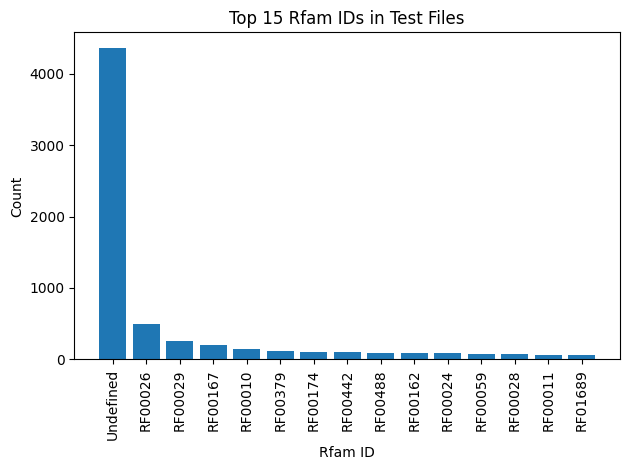

In [7]:
# plot 10 most frequent Rfam IDs
# make bar plot of counts
import matplotlib.pyplot as plt
rfam_ids = list(sorted_counts.keys())[:15]
rfam_counts = list(sorted_counts.values())[:15]
plt.bar(rfam_ids, rfam_counts)
plt.xlabel("Rfam ID")
plt.ylabel("Count")
plt.title("Top 15 Rfam IDs in Test Files")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [111]:
import pandas as pd
df = pd.read_csv('../grapharna_1seg.csv')
df['pdb_id'] = [x.split('_')[0] for x in df['pdb']]
df

,pdb,rms,ermsd,inf,tmscore,gdts,lddt,pdb_id
0,3SNP_1_D_D_14_C_AA.pdb,0.497,1.045,1.000,NaN,NaN,0.773,3SNP
1,4L8H_1_R_R_10_U_AA.pdb,0.553,1.210,1.000,NaN,NaN,0.806,4L8H
2,7MKY_1_A_A_40_G_AA.pdb,0.558,0.387,1.000,NaN,NaN,0.957,7MKY
3,3D0U_1_A_A_145_A_AA.pdb,0.560,0.395,1.000,NaN,NaN,0.892,3D0U
4,5NDH_1_A_A_5_G_AA.pdb,0.571,1.146,1.000,NaN,NaN,0.852,5NDH
...,...,...,...,...,...,...,...,...
1418,2OIU_1_P_P_34_C_AA.pdb,12.597,1.414,1.000,NaN,NaN,0.572,2OIU
1419,4QJD_1_D_D_51_C_AA.pdb,13.017,1.675,1.000,NaN,NaN,0.439,4QJD
1420,2ZY6_1_A_A_10_G_AA.pdb,13.103,1.705,0.894,NaN,NaN,0.521,2ZY6
1421,8H2H_1_A_A_2456_A_AA.pdb,13.658,1.858,1.000,NaN,NaN,0.319,8H2H


In [112]:
df['rfam_id'] = df['pdb_id'].apply(lambda x: rfam_dict.get(x.upper(), None))
# drop rows if rfam_id in rRNA_tRNA
df = df[~df['rfam_id'].isin(rRNA_tRNA)]
df


,pdb,rms,ermsd,inf,tmscore,gdts,lddt,pdb_id,rfam_id
0,3SNP_1_D_D_14_C_AA.pdb,0.497,1.045,1.000,NaN,NaN,0.773,3SNP,RF00037
1,4L8H_1_R_R_10_U_AA.pdb,0.553,1.210,1.000,NaN,NaN,0.806,4L8H,None
2,7MKY_1_A_A_40_G_AA.pdb,0.558,0.387,1.000,NaN,NaN,0.957,7MKY,None
3,3D0U_1_A_A_145_A_AA.pdb,0.560,0.395,1.000,NaN,NaN,0.892,3D0U,RF00168
4,5NDH_1_A_A_5_G_AA.pdb,0.571,1.146,1.000,NaN,NaN,0.852,5NDH,None
...,...,...,...,...,...,...,...,...,...
1418,2OIU_1_P_P_34_C_AA.pdb,12.597,1.414,1.000,NaN,NaN,0.572,2OIU,None
1419,4QJD_1_D_D_51_C_AA.pdb,13.017,1.675,1.000,NaN,NaN,0.439,4QJD,None
1420,2ZY6_1_A_A_10_G_AA.pdb,13.103,1.705,0.894,NaN,NaN,0.521,2ZY6,None
1421,8H2H_1_A_A_2456_A_AA.pdb,13.658,1.858,1.000,NaN,NaN,0.319,8H2H,RF00029
